In [1]:
import vipy.video
import numpy as np

In [2]:
# Load a video by downscaling by 1/4, rotating 90 degrees and trimming from frames [0,3]
vid = vipy.video.Video(filename='../test/Video.mp4').load(rescale=0.25, rotation='rot90ccw', startframe=0, endframe=3)
print(vid)

[vipy.video.load]: Loading "../test/Video.mp4"
<vipy.video: height=270, width=480, frames=3, color=rgb, filename="../test/Video.mp4">


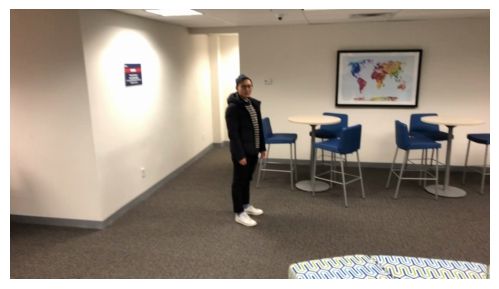

<vipy.image: height=270, width=480, color=rgb>

In [3]:
vid[0].show()

In [4]:
# All frames are stored as mutable numpy arrays, which allows for writing during iteration
for im in vid:
    print(im)
    img = im.numpy()
    img[0:100, 0:100] = np.uint8(255*np.random.rand(100,100,3))        

<vipy.image: height=270, width=480, color=rgb>
<vipy.image: height=270, width=480, color=rgb>
<vipy.image: height=270, width=480, color=rgb>


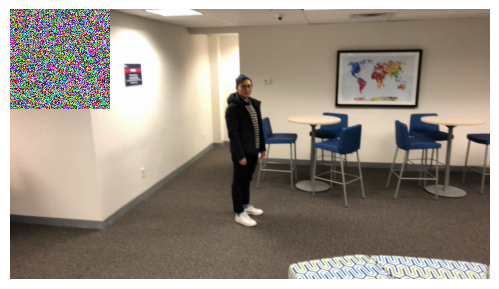

<vipy.image: height=270, width=480, color=rgb>

In [5]:
vid[0].show()

In [6]:
# Alternatively, frames can be iterated as numpy arrays()
for img in vid.numpy():
    print(type(img))
    print(img.shape)
    img[-100:, -100:] = [0,0,255]

<class 'numpy.ndarray'>
(270, 480, 3)
<class 'numpy.ndarray'>
(270, 480, 3)
<class 'numpy.ndarray'>
(270, 480, 3)


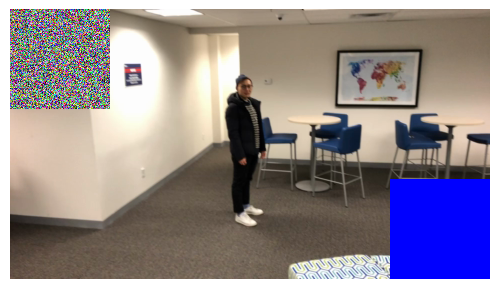

<vipy.image: height=270, width=480, color=rgb>

In [7]:
# Frames share memory with the video, so modifying a frame will modify the video
vid[0].show()

In [8]:
# Entire frames should be modified using an array view (e.g. img[...] = ), not using a local assigment (e.g. img = )
# This will share the underlying numpy buffers between frames and video
for img in vid.numpy():
    img[...] = np.uint8(0.5*img)

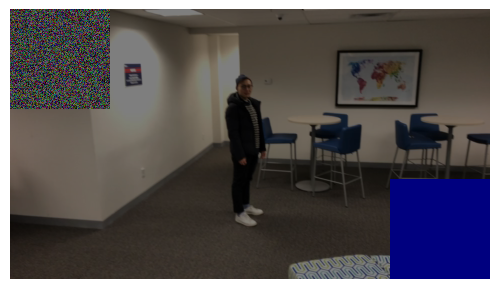

<vipy.image: height=270, width=480, color=rgb>

In [9]:
vid[0].show()